In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV

path = "Resources/trip.csv"
bike_df = pd.read_csv(path, low_memory=False)
bike_df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [3]:
#  Get the names of the columns.

bike_df.columns

Index(['stoptime', 'bikeid', 'tripduration', 'from_station_name',
       'to_station_name', 'from_station_id', 'to_station_id', 'usertype',
       'gender', 'birthyear'],
      dtype='object')

In [4]:
# Create a clean DataFrame after dropping null values

bike_df.dropna(inplace=True)
bike_df.head()

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [5]:
# Split up the data into groups based upon 'gender' and 'stoptime'

group_data = bike_df.groupby(["gender", "stoptime"])

# And, find out how many bike trips each gender took.

count_series = group_data["tripduration"].count()
count_series

gender    stoptime       
Female    1/1/2015 11:01     2
          1/1/2015 11:54     2
          1/1/2015 12:22     2
          1/1/2015 13:16     4
          1/1/2015 13:32     2
                            ..
Other     9/9/2015 21:41     1
          9/9/2015 7:44      1
          9/9/2015 8:35      1
          9/9/2015 9:44      1
stoptime  4/17/2015 19:21    1
Name: tripduration, Length: 131215, dtype: int64

In [6]:
# Reset the index of the previous Pandas Series to convert to a DataFrame. 

gender_stoptime_df = count_series.reset_index()
gender_stoptime_df.head()

,gender,stoptime,tripduration
0,Female,1/1/2015 11:01,2
1,Female,1/1/2015 11:54,2
2,Female,1/1/2015 12:22,2
3,Female,1/1/2015 13:16,4
4,Female,1/1/2015 13:32,2


In [7]:
# Get the datatypes for the DataFrame columns.

gender_stoptime_df.dtypes

gender          object
stoptime        object
tripduration     int64
dtype: object

In [8]:
#  Convert the 'stoptime' column to a datetime object.

gender_stoptime_df["stoptime"] = pd.to_datetime(gender_stoptime_df["stoptime"])

In [9]:
# Check the datatypes for each column.

gender_stoptime_df.dtypes

gender                  object
stoptime        datetime64[ns]
tripduration             int64
dtype: object

In [10]:
# Check the DataFrame.

gender_stoptime_df.head()

,gender,stoptime,tripduration
0,Female,2015-01-01 11:01:00,2
1,Female,2015-01-01 11:54:00,2
2,Female,2015-01-01 12:22:00,2
3,Female,2015-01-01 13:16:00,4
4,Female,2015-01-01 13:32:00,2


In [11]:
# Create a pivot table with the 'stoptime' as the index and the columns ='gender' with the trip counts in each row.

gender_stoptime_pivot_df = gender_stoptime_df.pivot(index="stoptime", columns="gender", values="tripduration")
gender_stoptime_pivot_df.head()

gender,Female,Male,Other,stoptime
stoptime,,,,
2014-10-13 10:47:00,NaN,2.0,NaN,NaN
2014-10-13 10:48:00,4.0,4.0,NaN,NaN
2014-10-13 10:49:00,NaN,2.0,NaN,NaN
2014-10-13 11:45:00,4.0,6.0,NaN,NaN
2014-10-13 11:47:00,2.0,12.0,NaN,NaN


In [12]:
#  Drop the stoptime column.

gender_stoptime_pivot_df.drop(columns="stoptime", inplace=True)
gender_stoptime_pivot_df.head()

gender,Female,Male,Other
stoptime,,,
2014-10-13 10:47:00,NaN,2.0,NaN
2014-10-13 10:48:00,4.0,4.0,NaN
2014-10-13 10:49:00,NaN,2.0,NaN
2014-10-13 11:45:00,4.0,6.0,NaN
2014-10-13 11:47:00,2.0,12.0,NaN


In [17]:
# Create a new DataFrame from the pivot table DataFrame by filtering for the given dates, '2015-01-01':'2015-12-31'. 

jan_dec_2015_df = gender_stoptime_pivot_df.loc['2015-01-01':'2015-12-31']

In [19]:
# Resample the DataFrame by the week. i.e., "W", and get the trip counts for each week.  

resampled_df = jan_dec_2015_df.resample("W").count()
resampled_df.head()

gender,Female,Male,Other
stoptime,,,
2015-01-04,68,206,5
2015-01-11,247,944,5
2015-01-18,226,963,11
2015-01-25,313,992,17
2015-02-01,294,1036,23


Text(0, 0.5, 'Rides')

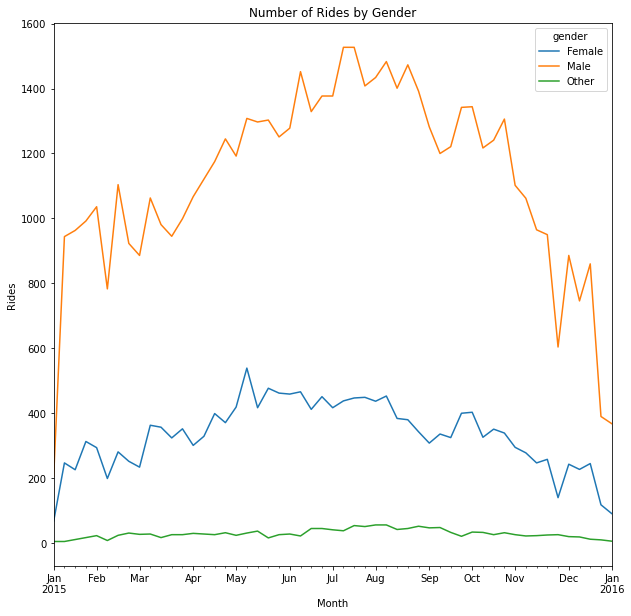

In [23]:
#  Plot the resample DataFrame 

sample_plot = resampled_df.plot(figsize=(10, 10))

# Add a title 
sample_plot.set_title("Number of Rides by Gender")


# Add a x- and y-axis label.
sample_plot.set_xlabel("Month")
sample_plot.set_ylabel("Rides")